## Prompt Chaining

ek Task ko chote chote subtasks mei break krna taaki accuracy maintain rahe is prompt chaining, like jese neeche wale example mei generate a story ko teen subtask mei break krdiya for better accuracy --> generate a story --> improve the story --> polish the story...

Used for
- improving accuracy
- better context management etc


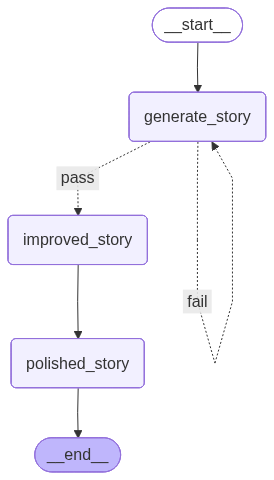

In [22]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
import os
from dotenv import load_dotenv
from langchain_groq import ChatGroq

load_dotenv()

groq_api_key = os.getenv("GROQ_API_KEY")
class AgentState(TypedDict):
    topic: str
    story: str
    improved_story: str
    final: str


llm = ChatGroq(model ="llama-3.1-8b-instant", api_key= groq_api_key)
graph = StateGraph(AgentState)


def generate_story (state: AgentState)-> dict:
    
    prompt = f"Generate a short story from the following topic: {state["topic"]}"
    result = llm.invoke(prompt)

    return {"story": result.content}


def logic(state: AgentState) -> str:
    if state["story"] == "?" or state["story"]== "!":
        return "fail"
    
    return "pass"


def improved_story(state: AgentState) -> dict:
    prompt = f"Improve the story and the chatacters in it. the story is {state["story"]}"
    result = llm.invoke(prompt)

    return {"improved_story": result.content}

def polished_story(state: AgentState) -> dict:
    prompt = f"Polish the story. the story is {state["improved_story"]}"
    result = llm.invoke(prompt)


    return {"final": result.content}



graph.add_node("generate_story", generate_story)
graph.add_node("improved_story", improved_story)
graph.add_node("polished_story", polished_story)

graph.add_edge(START, "generate_story")
graph.add_conditional_edges("generate_story", logic, {"pass": "improved_story", "fail": "generate_story"})
graph.add_edge("improved_story", "polished_story")
graph.add_edge("polished_story", END)

graph_builder = graph.compile()
graph_builder

In [20]:
state = {"topic": "King Kong"}

answer = graph_builder.invoke(state)
answer

{'topic': 'King Kong',
 'story': '**The Lost City of Kong**\n\nDeep within the heart of the dense jungle, a team of scientists and explorers stumbled upon an ancient temple, hidden away for centuries. Led by the fearless and determined Dr. Rachel Kim, their mission was to uncover the secrets of the fabled Lost City of Kong.\n\nAs they ventured deeper into the temple, they discovered a series of cryptic symbols etched into the walls. The team\'s linguist, Dr. Mark Taylor, deciphered the message, revealing a hidden chamber deep within the structure.\n\nThe team cautiously made their way to the chamber, their hearts racing with anticipation. As they pushed aside the vines and branches, they were met with an astonishing sight – a colossal statue of King Kong, the legendary giant ape, stood towering over them.\n\nDr. Rachel Kim, a renowned expert on Kong, gazed in awe at the statue. According to legend, Kong was said to have inhabited the Lost City, a place of ancient magic and power. The t